2.4270813389349275e+26


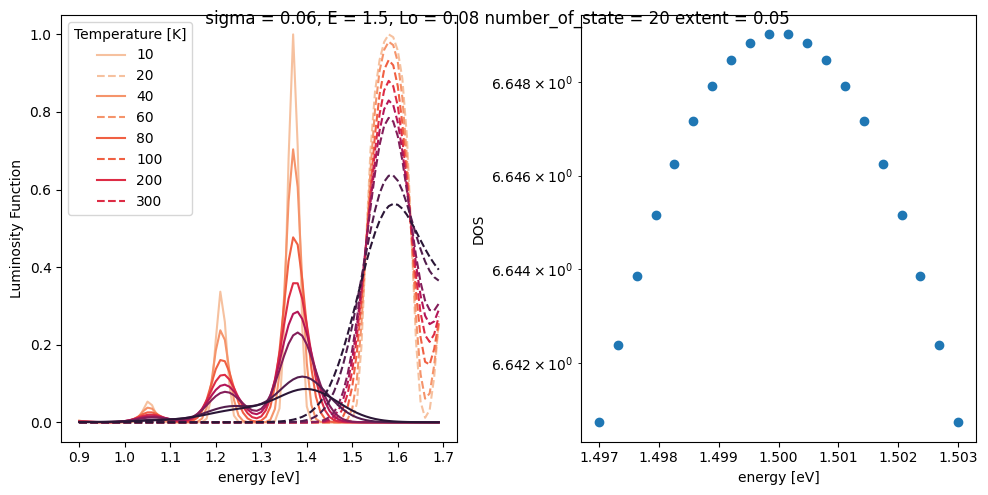

In [2]:
from pl_temp_fit import generate_data_utils, Exp_data_utils
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pl_temp_fit.model_function import LTL

def pl_trial(
    temperature_list_pl,
    hws_pl,
    fixed_parameters_dict={},
    params_to_fit={},
):
    """Run the model to generate the  PL spectra.

    Args:
    ----
    temperature_list_pl (np.array): The temperature list for the PL spectra
    hws_pl (np.array): The photon energies for the PL spectra
    fixed_parameters_dict (dict): The fixed parameters for the model in a dictionary for the different classes
    params_to_fit (dict): The parameters to fit in the model

    Returns:
    -------
    tuple: The model data for the PL spectra and the radiative and non-radiative recombination rates

    """
    data = LTL.Data()
    data.update(**fixed_parameters_dict)
    data.update(**params_to_fit)
    data.D.Luminecence_exp = "PL"
    data.D.T = temperature_list_pl  # np.array([300.0, 150.0, 80.0])
    LTL.ltlcalc(data)
    pl_results = data.D.kr_hw  # .reshape(-1, 1)
    pl_results_interp = np.zeros((len(hws_pl), len(temperature_list_pl)))
    abs_results_interp = np.zeros((len(hws_pl), len(temperature_list_pl)))
    for i in range(len(temperature_list_pl)):
        pl_results_interp[:, i] = np.interp(
            hws_pl, data.D.hw, pl_results[:, i]
        )
        abs_results_interp[:,i] = np.interp(
            hws_pl, data.D.hw, data.D.alpha[:, i]
        )
    print(pl_results_interp[pl_results_interp>0].max())
    pl_results_interp = pl_results_interp/pl_results_interp[pl_results_interp>0].max()
    abs_results_interp = abs_results_interp / abs_results_interp.reshape(-1).max()
    return pl_results_interp, abs_results_interp
def plot_case(E,sigma,Lo,numbrstates,disorder_extent):
    fixed_parameters_dict = {
        "EX":{'numbrstates':numbrstates,'disorder_ext':disorder_extent},
        "CT":{'off':1},  
        "D":{'hw':np.arange(0, 5, 0.01)},
    }
    true_parameters ={
        "EX":{"E":E,"sigma":sigma,"Li":7.8e-2,"Lo":Lo,"hO":0.159},
        "CT":{},
        "D":{},
    }
    temperature_list_pl = [10,20,40,60,80,100,200,300]
    hws_pl = np.arange(0.9,1.7,0.01)
    model_data_pl,abs_results_interp  = pl_trial(
        temperature_list_pl,
        hws_pl,
        fixed_parameters_dict,
        true_parameters,
    )
    color_list = sns.color_palette("rocket_r", len(temperature_list_pl))
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    ax = axes[0]
    for i in range(len(temperature_list_pl)):
        ax.plot(hws_pl,model_data_pl[:,i],color=color_list[i])
        ax.plot(hws_pl,abs_results_interp[:,i],color=color_list[i],linestyle='--') 

    ax.set_xlabel('energy [eV]')
    ax.set_ylabel('Luminosity Function')
    ax.legend(temperature_list_pl,title='Temperature [K]')
    ax = axes[1]
    DG0 = np.linspace(
                E- disorder_extent * sigma, E+disorder_extent*sigma, numbrstates
            )
    ax.scatter(DG0, np.exp(-((DG0-E)**2)/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2),label='Gaussian')
    ax.set_xlabel('energy [eV]')
    ax.set_ylabel('DOS')
    ax.set_yscale('log')
    fig.tight_layout()
    fig.suptitle(f' sigma = {sigma}, E = {E}, Lo = {Lo} number_of_state = {numbrstates} extent = {disorder_extent}')
E , sigma,Lo,numbrstates,disorder_extent = 1.5, 0.06, 0.08, 20, 0.05
plot_case(E,sigma,Lo,numbrstates,disorder_extent)

/media/mohammed/Work/Work/pl_temp_fit/src/pl_temp_fit/model_function/UtilFunctions.py:126: RuntimeWarning: overflow encountered in exp
  + (1 - xParam["coeff"]) * np.exp(-State.DG0[j] / (C.kb * D.T[i]))
/media/mohammed/Work/Work/pl_temp_fit/src/pl_temp_fit/model_function/UtilFunctions.py:126: RuntimeWarning: invalid value encountered in multiply
  + (1 - xParam["coeff"]) * np.exp(-State.DG0[j] / (C.kb * D.T[i]))
/media/mohammed/Work/Work/pl_temp_fit/src/pl_temp_fit/model_function/RecombinationRates.py:28: RuntimeWarning: invalid value encountered in divide
  State.kr_hw = sum_integral / Zrec
/media/mohammed/Work/Work/pl_temp_fit/src/pl_temp_fit/model_function/RecombinationRates.py:78: RuntimeWarning: invalid value encountered in divide
  sum_integral = np.sum(integral, axis=2) / Zrec


3.860896408802289e+23


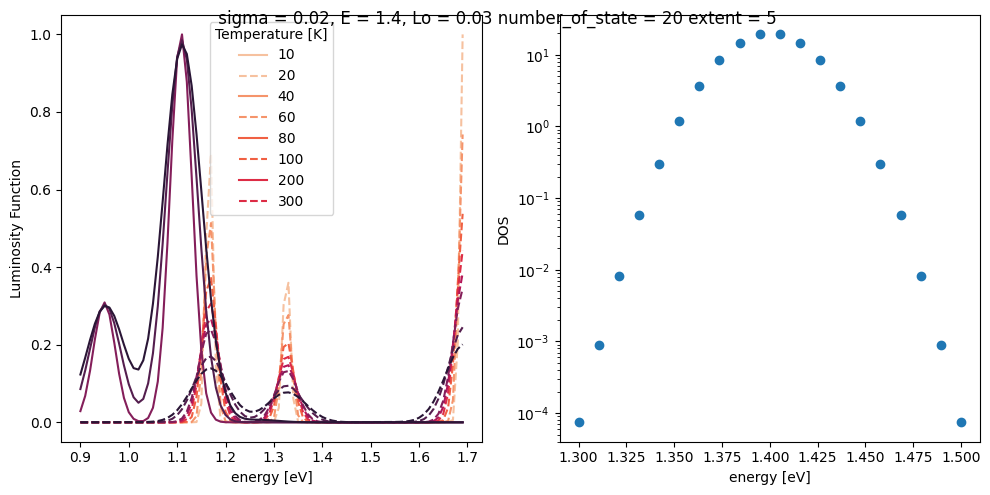

In [2]:
E , sigma,Lo,numbrstates,disorder_extent = 1.4, 0.02, 0.03, 20, 5
plot_case(E,sigma,Lo,numbrstates,disorder_extent)

8.372941120173873e+24


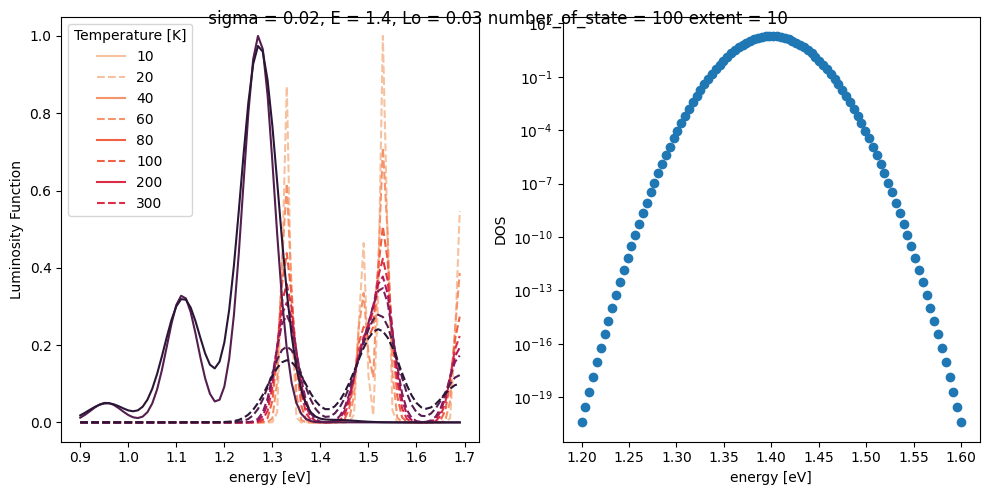

In [3]:
E , sigma,Lo,numbrstates,disorder_extent = 1.4, 0.02, 0.03, 100, 10
plot_case(E,sigma,Lo,numbrstates,disorder_extent)

3.803581911008886e+23


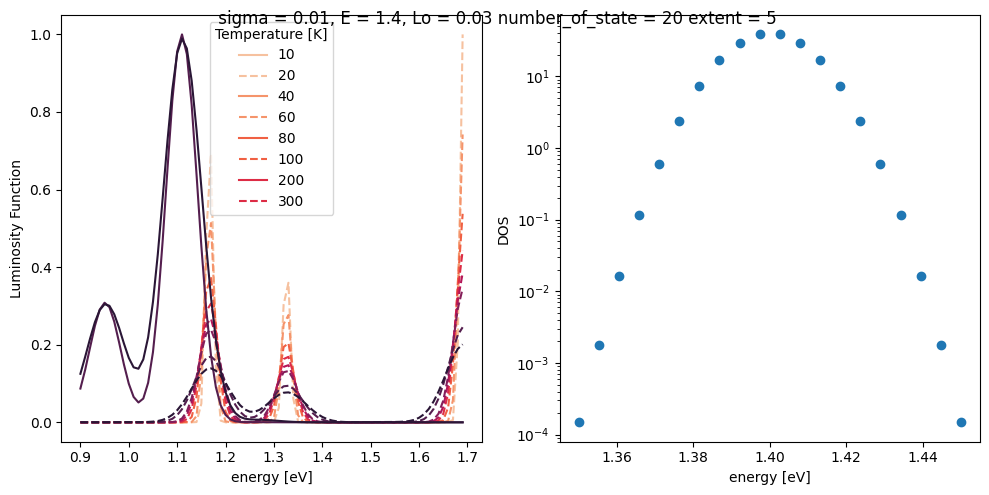

In [4]:
E , sigma,Lo,numbrstates,disorder_extent = 1.4, 0.01, 0.03, 20, 5
plot_case(E,sigma,Lo,numbrstates,disorder_extent)

/media/mohammed/Work/Work/pl_temp_fit/src/pl_temp_fit/model_function/RecombinationRates.py:28: RuntimeWarning: divide by zero encountered in divide
  State.kr_hw = sum_integral / Zrec
/media/mohammed/Work/Work/pl_temp_fit/src/pl_temp_fit/model_function/RecombinationRates.py:78: RuntimeWarning: divide by zero encountered in divide
  sum_integral = np.sum(integral, axis=2) / Zrec
/media/mohammed/Work/Work/pl_temp_fit/src/pl_temp_fit/model_function/RecombinationRates.py:79: RuntimeWarning: invalid value encountered in divide
  State.knr = (sum_integral * kth) / (sum_integral + kth)


9.03366426124132e+24


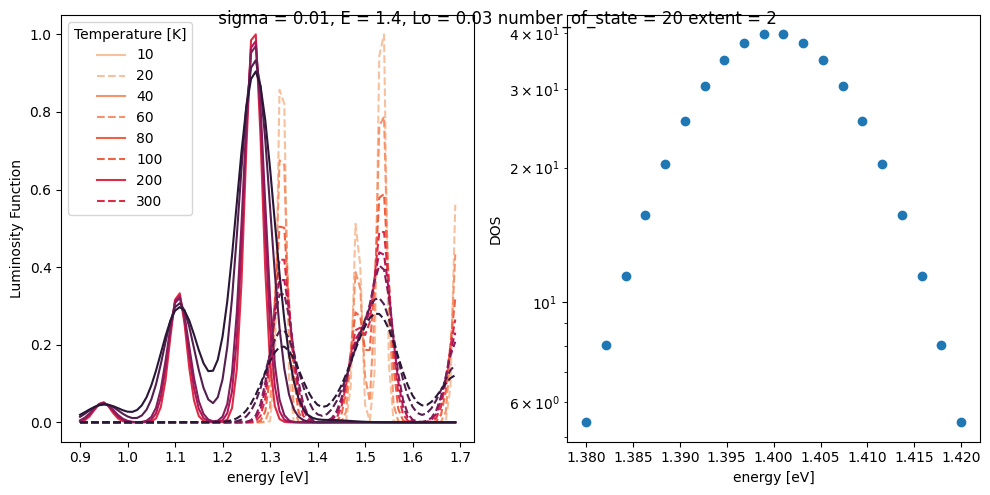

In [5]:
E , sigma,Lo,numbrstates,disorder_extent = 1.4, 0.01, 0.03, 20, 2
plot_case(E,sigma,Lo,numbrstates,disorder_extent)

9.935377819783387e+24


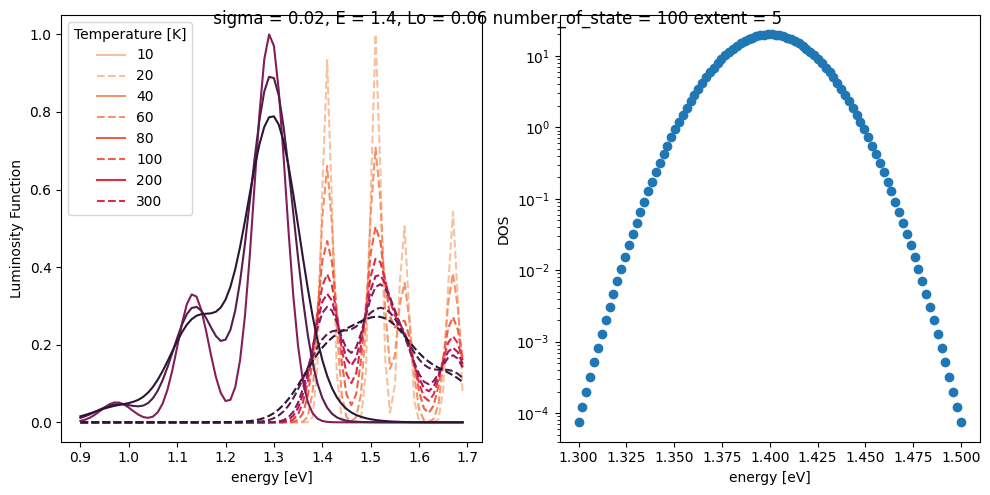

In [6]:
E , sigma,Lo,numbrstates,disorder_extent = 1.4, 0.02, 0.06, 100, 5
plot_case(E,sigma,Lo,numbrstates,disorder_extent)

2.095817500995005e+25


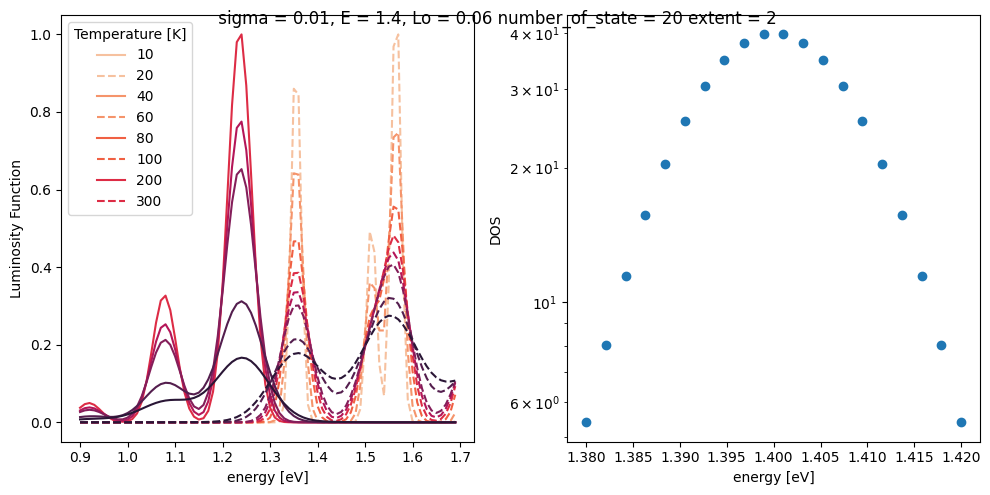

In [7]:
E , sigma,Lo,numbrstates,disorder_extent = 1.4, 0.01, 0.06, 20, 2
plot_case(E,sigma,Lo,numbrstates,disorder_extent)